In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [2]:
!nvidia-smi

Fri Apr 11 15:55:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!git clone https://github.com/yosephbernandus/cuda-100-days

Cloning into 'cuda-100-days'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 96 (delta 25), reused 78 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (96/96), 398.66 KiB | 26.58 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [6]:
%cd cuda-100-days/day002
!ls -la

/content/cuda-100-days/day002
total 564
drwxr-xr-x 2 root root   4096 Apr 11 15:57 .
drwxr-xr-x 6 root root   4096 Apr 11 15:57 ..
-rw-r--r-- 1 root root   8797 Apr 11 15:57 colorToGrayscaleConversion.cu
-rw-r--r-- 1 root root   9661 Apr 11 15:57 cuda2DThreadtoPixelMapping.svg
-rw-r--r-- 1 root root   8962 Apr 11 15:57 cuda2ThreadMappingDiagram.svg
-rw-r--r-- 1 root root      0 Apr 11 15:57 cuda_colortograyscaleconversion.ipynb
-rw-r--r-- 1 root root    248 Apr 11 15:57 .gitignore
-rw-r--r-- 1 root root 518456 Apr 11 15:57 input.bmp
-rw-r--r-- 1 root root    394 Apr 11 15:57 Makefile
-rw-r--r-- 1 root root   2381 Apr 11 15:57 README.md


In [23]:
!make

nvcc -std=c++11 -O3 -o colorToGrayscaleConversion colorToGrayscaleConversion.cu
colorToGrayscaleConversion.cu(138): warning #69-D: integer conversion resulted in truncation
          54 + 1024, 0, 0, 0
          ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

colorToGrayscaleConversion.cu(152): warning #69-D: integer conversion resulted in truncation
          256, 0, 0, 0,
          ^

colorToGrayscaleConversion.cu(153): warning #69-D: integer conversion resulted in truncation
          256, 0, 0, 0
          ^

colorToGrayscaleConversion.cu(138): warning #69-D: integer conversion resulted in truncation
          54 + 1024, 0, 0, 0
          ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

colorToGrayscaleConversion.cu(152): warning #69-D: integer conversion resulted in truncation
          256, 0, 0, 0,
          ^

colorToGrayscaleConversion.cu(153): warning #69-D: integer conversion resulted in truncation
          

In [37]:
!nvcc -std=c++11 -O3 -arch=sm_70 -diag-suppress=1650 colorToGrayscaleConversion.cu -o colorToGrayscaleConversion

colorToGrayscaleConversion.cu(66): warning #177-D: variable "imageSize" was declared but never referenced
    int imageSize = rowSize * (*height);
        ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"



In [38]:
!./colorToGrayscaleConversion input.bmp output_gray.bmp

Image loaded: 640x426 pixels

Sample pixels from loaded image:
Pixel[0][0] = RGB(118, 83, 116)
Pixel[0][1] = RGB(117, 82, 115)
Pixel[0][2] = RGB(117, 79, 116)
Pixel[0][3] = RGB(118, 80, 117)
Pixel[0][4] = RGB(123, 83, 120)
Pixel[1][0] = RGB(120, 84, 120)
Pixel[1][1] = RGB(119, 83, 119)
Pixel[1][2] = RGB(119, 81, 118)
Pixel[1][3] = RGB(120, 82, 119)
Pixel[1][4] = RGB(125, 85, 122)
Pixel[2][0] = RGB(121, 85, 121)
Pixel[2][1] = RGB(119, 83, 119)
Pixel[2][2] = RGB(119, 81, 118)
Pixel[2][3] = RGB(119, 81, 118)
Pixel[2][4] = RGB(123, 82, 122)
Pixel[3][0] = RGB(120, 86, 123)
Pixel[3][1] = RGB(119, 85, 122)
Pixel[3][2] = RGB(119, 83, 121)
Pixel[3][3] = RGB(119, 83, 121)
Pixel[3][4] = RGB(121, 83, 124)
Pixel[4][0] = RGB(121, 87, 124)
Pixel[4][1] = RGB(121, 87, 124)
Pixel[4][2] = RGB(121, 84, 125)
Pixel[4][3] = RGB(123, 86, 127)
Pixel[4][4] = RGB(119, 81, 122)

CUDA grid: 40x27 blocks of 16x16 threads

Sample pixels from grayscale result:
Pixel[0][0] = 91
Pixel[0][1] = 90
Pixel[0][2] = 88
Pixel[

In [18]:
# After running your CUDA program, check the first few bytes of the output file
!xxd -g 1 -l 100 output_gray.bmp

00000000: 42 4d 36 2d 04 00 00 00 00 00 36 00 00 00 28 00  BM6-......6...(.
00000010: 00 00 80 02 00 00 aa 01 00 00 01 00 08 00 00 00  ................
00000020: 00 00 00 29 04 00 00 00 00 00 00 00 00 00 00 00  ...)............
00000030: 00 00 00 00 00 00 00 00 00 00 01 01 01 00 02 02  ................
00000040: 02 00 03 03 03 00 04 04 04 00 05 05 05 00 06 06  ................
00000050: 06 00 07 07 07 00 08 08 08 00 09 09 09 00 0a 0a  ................
00000060: 0a 00 0b 0b                                      ....


In [15]:
!xxd -g 1 -l 100 input.bmp


00000000: 42 4d 8a 7b 0c 00 00 00 00 00 8a 00 00 00 7c 00  BM.{..........|.
00000010: 00 00 80 02 00 00 aa 01 00 00 01 00 18 00 00 00  ................
00000020: 00 00 00 7b 0c 00 00 00 00 00 00 00 00 00 00 00  ...{............
00000030: 00 00 00 00 00 00 00 00 ff 00 00 ff 00 00 ff 00  ................
00000040: 00 00 00 00 00 ff 42 47 52 73 80 c2 f5 28 60 b8  ......BGRs...(`.
00000050: 1e 15 20 85 eb 01 40 33 33 13 80 66 66 26 40 66  .. ...@33..ff&@f
00000060: 66 06 a0 99                                      f...


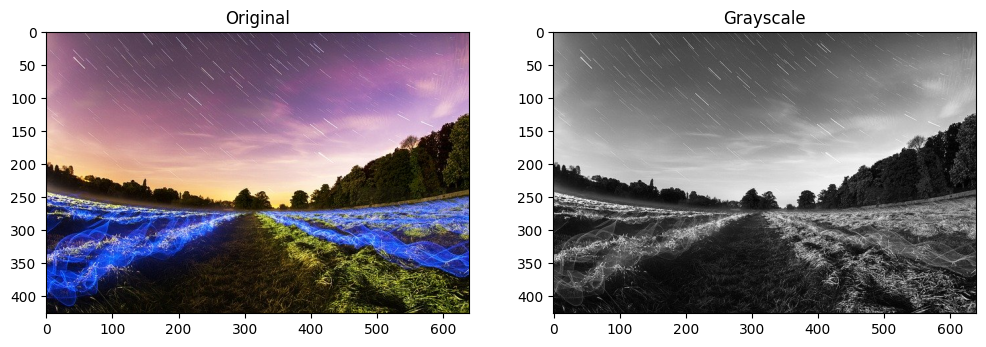

In [19]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('input.bmp')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Save grayscale image
cv2.imwrite('opencv_gray.bmp', gray)

# Display
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Grayscale')
plt.imshow(gray, cmap='gray')
plt.show()